In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [7]:
train.shape


(891, 12)

In [8]:
test.shape

(418, 11)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [19]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [23]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [24]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train['Embarked'].fillna('S',inplace=True)

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [28]:
x=test['Fare'].mean()

In [29]:
x

35.627188489208635

In [30]:
test['Fare'].fillna('x',inplace=True)

In [31]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [33]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [34]:
test_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),86)

In [39]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\hp\AppData\Local\Temp\ipykernel_608\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [41]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\hp\AppData\Local\Temp\ipykernel_608\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [44]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [45]:
train[train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [46]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [47]:
train.groupby(["Pclass"])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [48]:
train.groupby(["Sex"])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [49]:
train.groupby(["Embarked"])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_608\2772394355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"])


<Axes: xlabel='Age', ylabel='Density'>

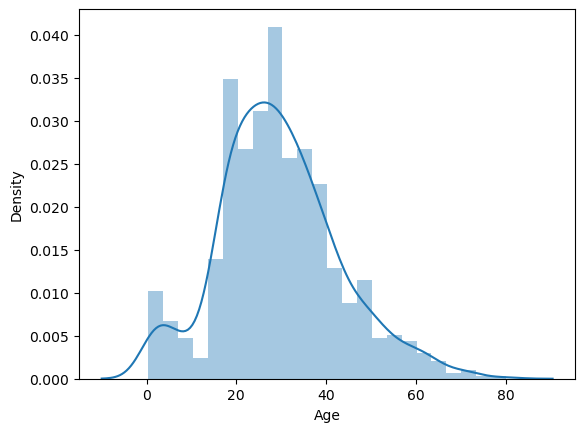

In [50]:
sns.distplot(train["Age"])

C:\Users\hp\AppData\Local\Temp\ipykernel_608\2909117575.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train["Survived"]==0])
C:\Users\hp\AppData\Local\Temp\ipykernel_608\2909117575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train["Survived"]==1])


<Axes: xlabel='Age', ylabel='Density'>

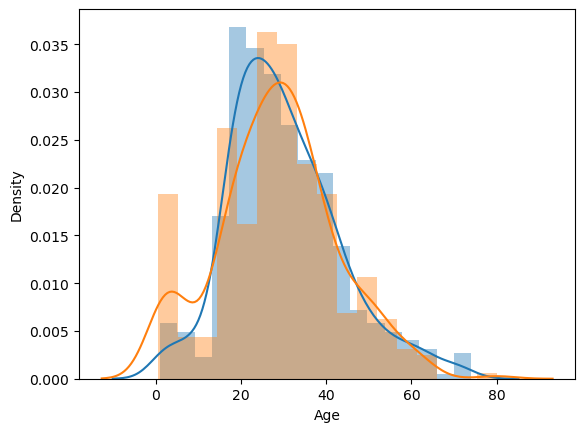

In [52]:
sns.distplot(train['Age'][train["Survived"]==0])
sns.distplot(train['Age'][train["Survived"]==1])

C:\Users\hp\AppData\Local\Temp\ipykernel_608\567159407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train["Survived"]==0])
C:\Users\hp\AppData\Local\Temp\ipykernel_608\567159407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train["Survived"]==1])


<Axes: xlabel='Fare', ylabel='Density'>

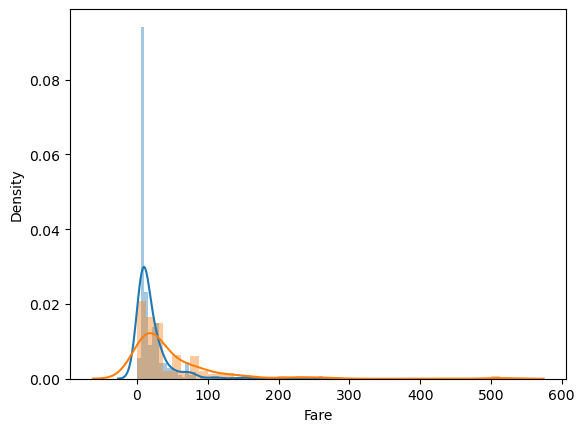

In [53]:
sns.distplot(train['Fare'][train["Survived"]==0])
sns.distplot(train['Fare'][train["Survived"]==1])

In [57]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [58]:
train["Family"]=train["SibSp"]+train["Parch"]+1

In [59]:
train["Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [60]:
test["Family"]=test["SibSp"]+test["Parch"]+1

In [62]:
train.groupby(['Family'])["Survived"].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [63]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [64]:
train["Family_size"]=train["Family"].apply(cal)

In [65]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,2,Medium


In [66]:
test["Family_size"]=test["Family"].apply(cal)

In [72]:
passengerId=test["PassengerId"].values

In [ ]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [76]:
train.drop(columns=['PassengerId','Name'],inplace=True)
test.drop(columns=['PassengerId','Name'],inplace=True)

In [77]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [83]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium


In [84]:
test.head(2)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0,0,1,0,0,1,0,1


In [86]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [ ]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [87]:
train.shape

(891, 10)

In [88]:
test.shape

(418, 9)

In [89]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [93]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pred=classifier.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7821229050279329

In [100]:
xf=test.iloc[:,:].values

In [107]:
xf

array([[34.5, 7.8292, 0, ..., 0, 0, 0],
       [47.0, 7.0, 0, ..., 1, 0, 1],
       [62.0, 9.6875, 1, ..., 0, 0, 0],
       ...,
       [38.5, 7.25, 0, ..., 1, 0, 0],
       [42.0, 8.05, 0, ..., 1, 0, 0],
       [40.0, 22.3583, 0, ..., 0, 0, 1]], dtype=object)